<a href="https://colab.research.google.com/github/hgploutz/food-sales-predictions/blob/main/Hannah_Ploutz_Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 4
Hannah Ploutz

##Data Dictionary

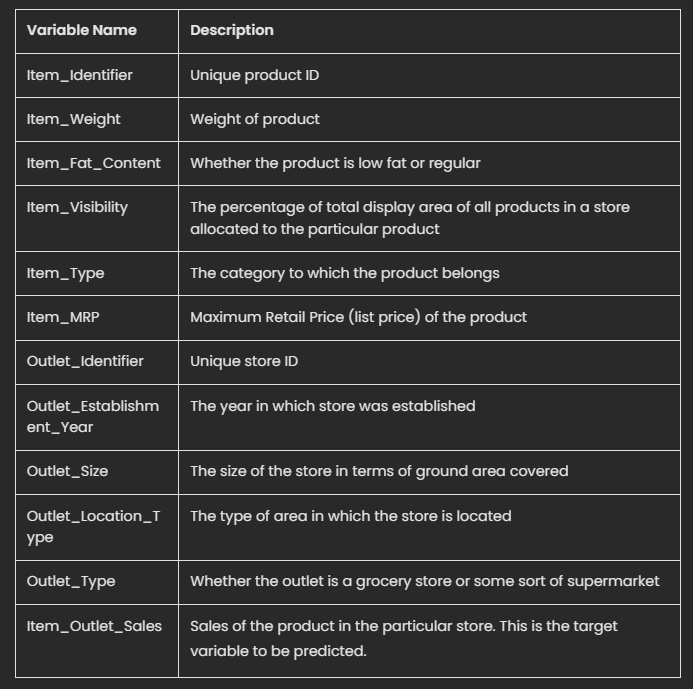

##Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Loading Data

Use Pandas to read the sales prediction data set into Google Colab.
<br>Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

In [2]:
filename = '/content/drive/MyDrive/01 - 04 Project 1/CSV/sales_predictions.csv'
df = pd.read_csv(filename)

## Data Cleaning

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#####1) How many rows and columns?

In [4]:
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


#####2) What are the datatypes of each variable?

In [5]:
data_types = df.dtypes
object_data_types = (data_types == "object").sum()
float_data_types = (data_types == "float").sum()
int_data_types = (data_types == "int").sum()

print(f'There are {object_data_types} object columns, {float_data_types} float columns, and {int_data_types} integer columns')

There are 7 object columns, 4 float columns, and 1 integer columns


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#####3) Are there duplicates? If so, drop any duplicates.

In [7]:
if df.duplicated().sum() == 0:
  print(f'There are {df.duplicated().sum()} duplicate rows, no need to delete any duplicate rows.')
else:
  df.drop_duplicates(inplace=True)
  print(f'{df.duplicated().sum()} duplicate rows have been dropped.')

There are 0 duplicate rows, no need to delete any duplicate rows.


#####4) Identify missing values

In [8]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3873 missing values.


#####5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).


In [9]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [10]:
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [11]:
df[df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [12]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
df['Outlet_Size'].value_counts()

<ipython-input-12-88ae5344cb92>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-12-88ae5344cb92>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

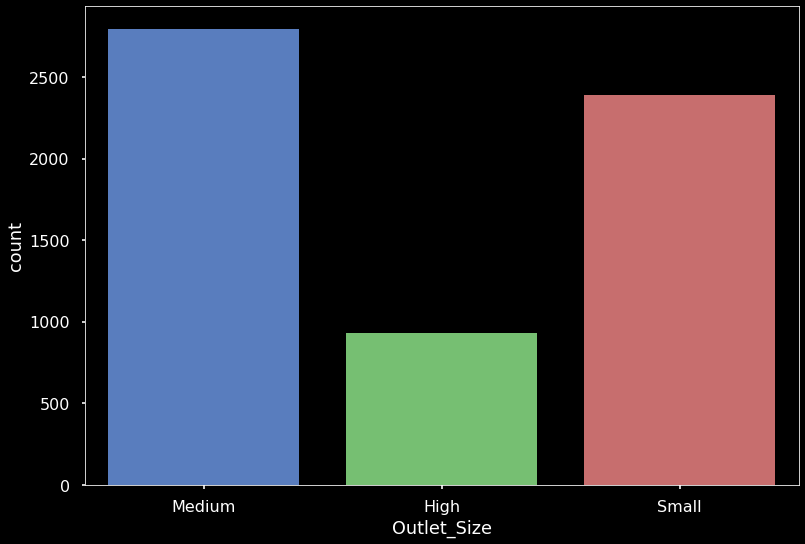

In [13]:
ax = sns.countplot(data = df, x = 'Outlet_Size');

I Decided to fill in the missing values in 'Outlet_Size' column with "Uknown" as there are a large amount of Medium and Small, and smaller amount of High.
<br>I don't want to make an assumption if its either "Medium" or "High" since both are fairly close to each other in number
<br>I also don't want to skew the data one way or another by adding a bias.

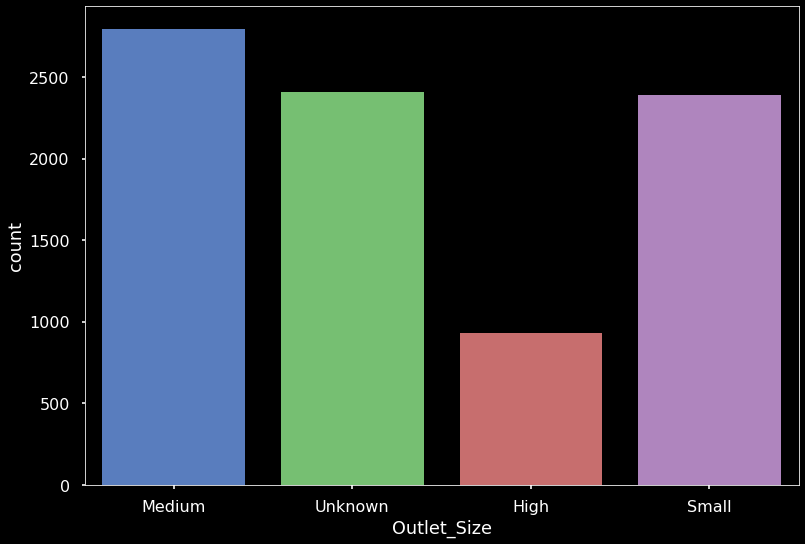

In [14]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
ax = sns.countplot(data = df, x = 'Outlet_Size');

In [15]:
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64





Item_Weight column is missing around 17% of the values, I will use the following strategy:
<br>I don't want to remove the rows, there is a lot of good data in there and its > 5%
<br>Looking at the mean and median of the Item_Weight column, they are fairly close to each other (12.6 and 12.85)
<br>I will replace the missing values with the median value of the column, which is less affected by outliers than the "mean" strategy




In [16]:
median_weight = df['Item_Weight'].median()
mean_weight = df['Item_Weight'].mean()
print(median_weight)
print(mean_weight)

12.6
12.857645184135976


In [17]:
df['Item_Weight'] = df['Item_Weight'].fillna(median_weight)

#####6) Confirm that there are no missing values after addressing them.



In [18]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#####7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [19]:
object_data_types_filter = data_types[(data_types == "object")]
object_data_types_filter

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [20]:
object_data_types_filter.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
for column in object_data_types_filter.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [23]:
for column in object_data_types_filter.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




#####8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Visuals

*Instructions*
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

###Histogram

Here I used the Item_MRP column from the dataframe to create a histogram that looks at the distribution of the items maximum retail price. The y column 'Number of Products' is the total number of products that are bucketed at each of the Maximum Retail Price intervals.

Text(0, 0.5, 'Number of Products')

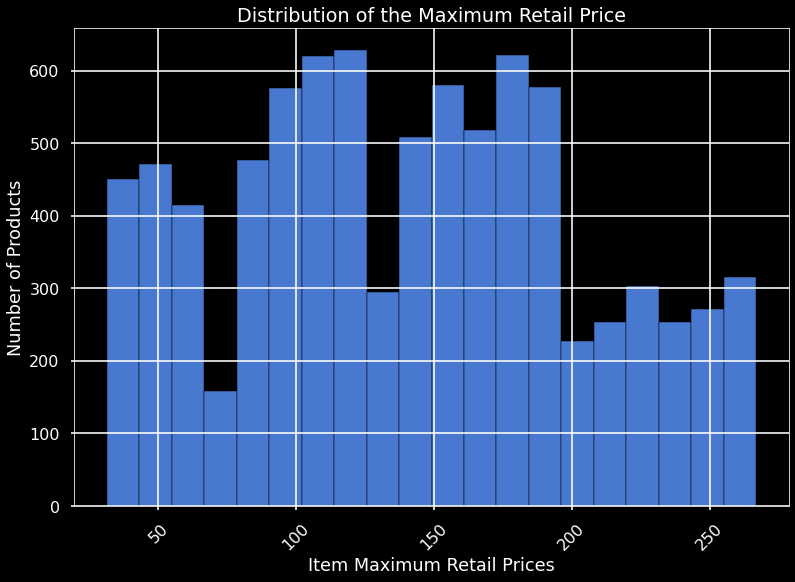

In [26]:
ax = df['Item_MRP'].hist(bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of the Maximum Retail Price')
ax.set_xlabel('Item Maximum Retail Prices')
ax.set_ylabel('Number of Products')

Here I used the Item_Outlet_Sales column from the dataframe to create a histogram that looks at the distribution of the Sales of the products in the particular stores. The y column 'Number of Products in Sales Range' is the frequency of sales amounts that are bucketed at each of the sales intervals. 

Text(0, 0.5, 'Number of Products in Sales Range')

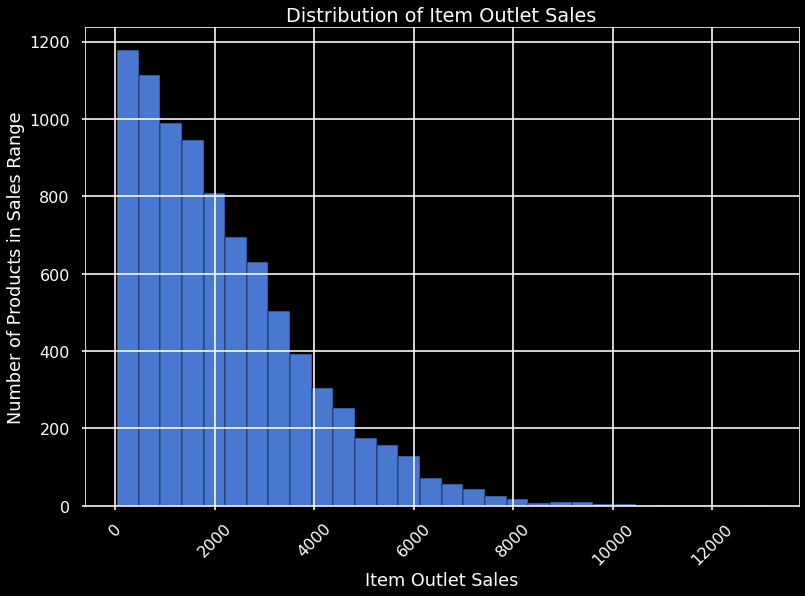

In [27]:
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales')
ax.set_ylabel('Number of Products in Sales Range')

Here I used the Item_Weight column from the dataframe to create a histogram that looks at the distribution of the Item's Weight. The y column 'Number of Products' is the total number of products that are bucketed at each of the Item Weight intervals.

Text(0, 0.5, 'Number of Products')

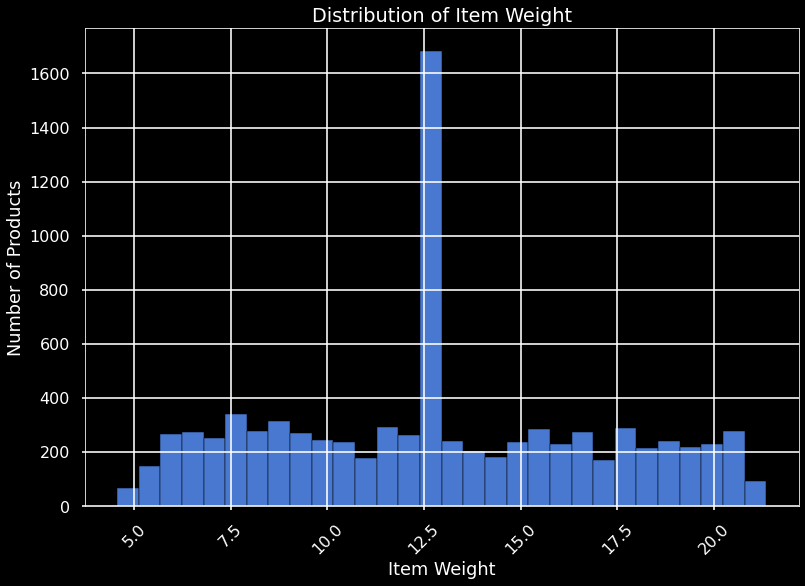

In [28]:
ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Item Weight')
ax.set_xlabel('Item Weight')
ax.set_ylabel('Number of Products')

Here I used the Outlet_Establishment_Year column from the dataframe to create a histogram that looks at the distribution of the years in which the Outlets were established. The y column 'Number of Products' is the total number of products that are bucketed at each of the Outlet Establishment's Year intervals.

Text(0, 0.5, 'Number of Outlets')

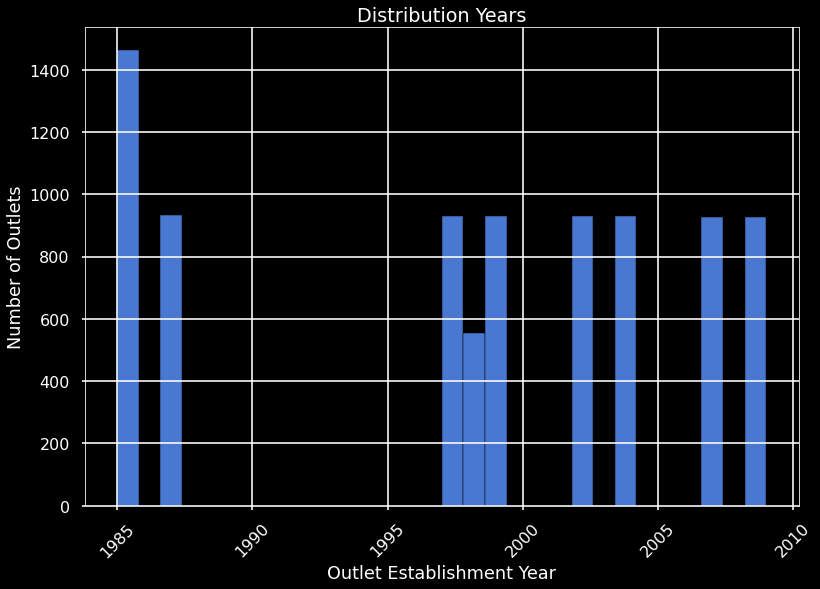

In [29]:
ax = df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution Years')
ax.set_xlabel('Outlet Establishment Year')
ax.set_ylabel('Number of Outlets')

Here I used the Item_visibility column from the dataframe to create a histogram that looks at the distribution of the percentage of total display area of all products in a store allocated to the particular product. The y column 'Count of Visibility Ranges' is the total count of those % that are bucketed at each of the % of Item Visbility Intervals.

Text(0, 0.5, 'Count of Visibilty Ranges')

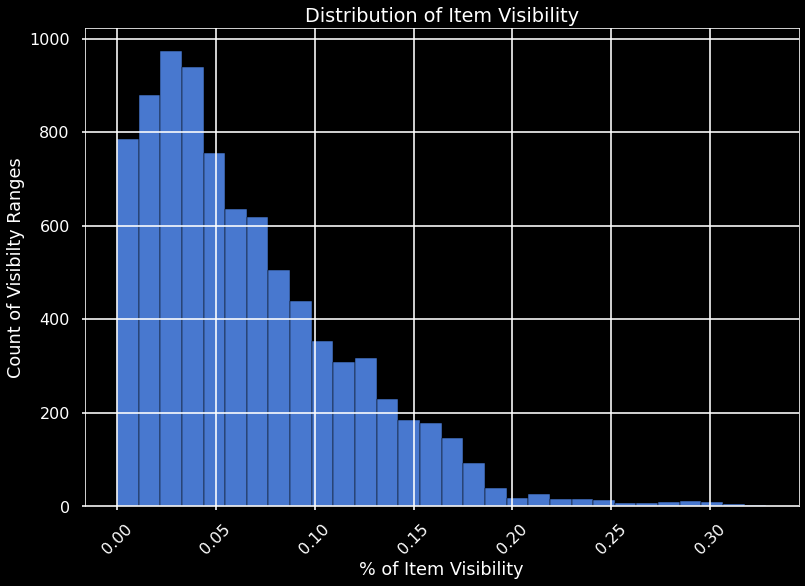

In [30]:
ax = df['Item_Visibility'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('% of Item Visibility')
ax.set_ylabel('Count of Visibilty Ranges')

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Boxplot

Here I look at a boxplot where the x-axis is "Item Fat Content" and the y-axis is the "Item Weight" and I am wanting to compare the Item Fat Content next to the Item Weight. Low Fat and Regular are the two categories in the Item Fat Content column. There are no outliers in these two boxplots, and both low fat and regular have similar distribution of data with Lowfat having a slightly wider range of heavier and lighter products

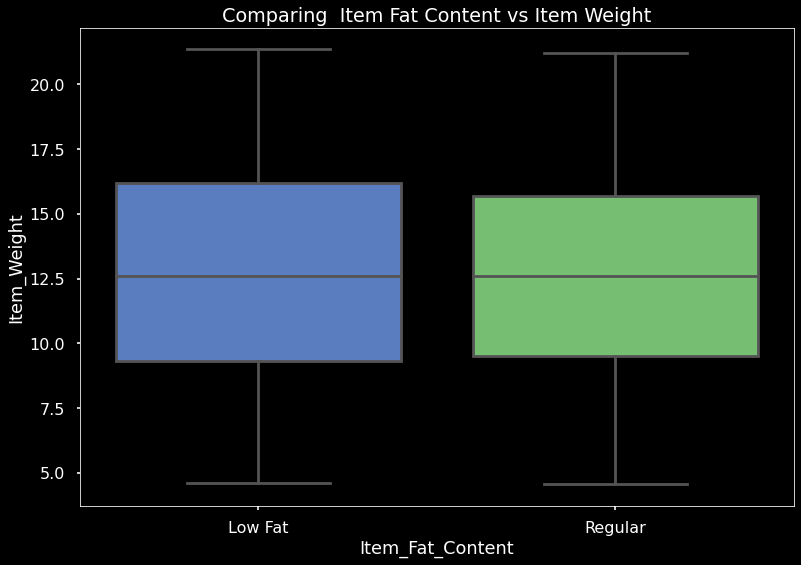

In [32]:
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
ax.set_title("Comparing  Item Fat Content vs Item Weight");

Here I look at boxplots where the x-axis is "Outlet Type" and the y-axis is the "Item Visibilty" and I am wanting to compare the Outlet Type next to the Item Visibilty in the store. Supermarket Type1, Supermarket2, Supermarket3 and Grocery Store are the four categories in the Outlet Type column. There are some outliers in these boxplots, with some more extreme outliers in the Grocery Store boxplot. Supermarket 1,2 and 3 have a similar distribution of data while the Grocery store seems to have a higher degree of item visibilty of their products compared to the other types.

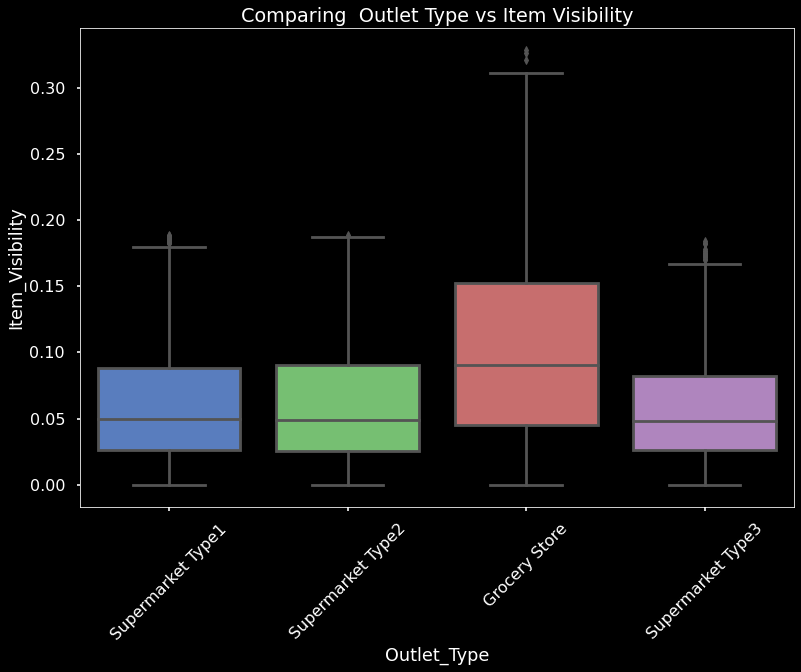

In [33]:
ax = sns.boxplot(x='Outlet_Type', y='Item_Visibility', data=df)
ax.set_title("Comparing  Outlet Type vs Item Visibility")
ax.tick_params(axis = 'x', rotation = 45);

Here I look at boxplots where the x-axis is "Item Type" and the y-axis is the "Item MRP" and I am wanting to compare the Item Types next to the Item MRP (Maximum Retail Price). There are 16 food type categories in the Item Type column. There are some outliers in the health and hygiene boxplot. Dairy seems to have a much wider distribution of its Item MRP with it being also one of the highest MRP prices.

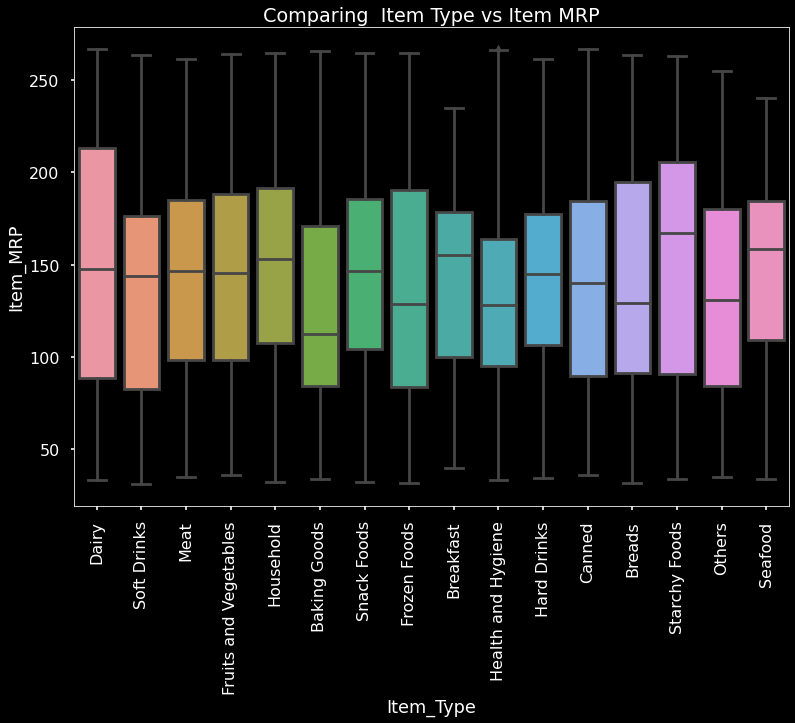

In [34]:
ax = sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
ax.set_title("Comparing  Item Type vs Item MRP")
ax.tick_params(axis = 'x', rotation = 90);

###Heatmap

Here I create a heatmap of the data. I notice that Item_MRP has a positive moderate correlation with Item_Outlet_Sales. All other items have a low range of correlation. I also set the figsize to 12,10 to be closer to a square and the color to shades of blue.

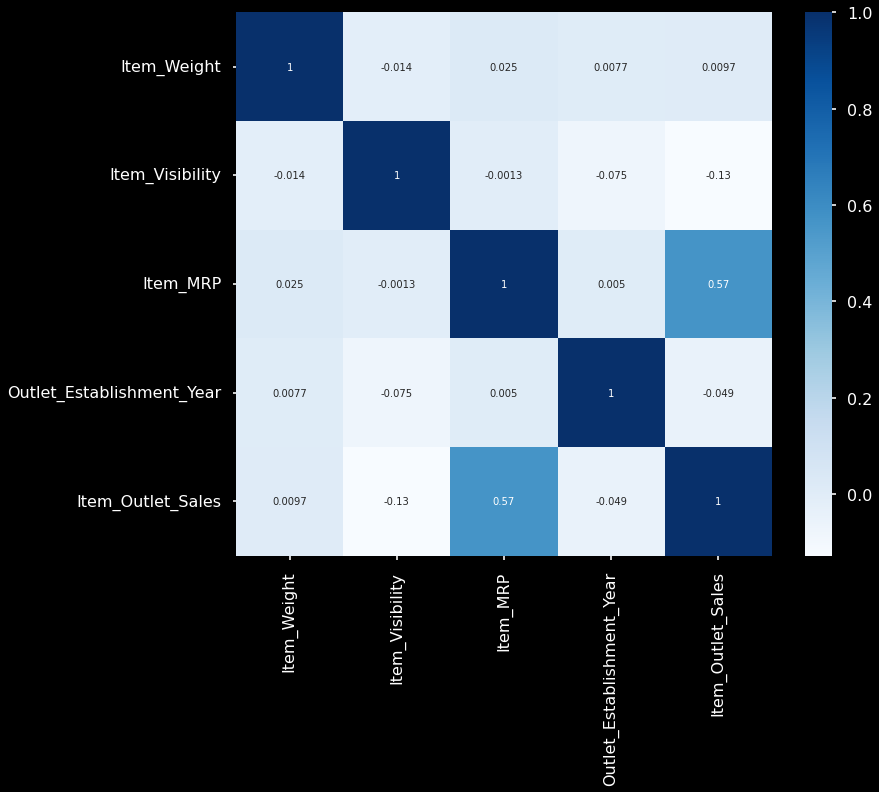

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True)

## Explanatory Visuals

For Part 4, our task is to build several data visualizations to help stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.
<br>
<br>We will build on our previous cleaning, exploration, and analysis.
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

###Questions to Answer



1.   Which Outlet Type has the most and least amount of sales?
2.   What is the Distribution of Item Visibility?
3.   Which of the Item Types has the heaviest and lowest average weight?



I first begin by using df.head to take a look at my first 5 columns

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####1.   Which Outlet Type has the most and least amount of sales?

I use df.groupby to group it by Outlet Type and calculate the mean of the Item Outlet Sales for each Outlet Type. I sort the values and assign it to the means variable

In [37]:
means = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

I then create a barchart using seaborn. I start with setting the figsize to 20,10, then I set the x axis to 'Outlet Type', y axis to 'Item Outlet Sales'. I then indicate order = means.index which then displays the bars on the x-axis in the order i created in the previous step for 'means'. After that I set the title 'Average Outlet Sales in USD vs. Outlet Type', the x label to 'Outlet Type' and the y label to 'Outlet Sales in USD'. Along the way I have adjusted the fontize and fonteight to my desired settings. I then create a new variable 'price_fmt' which then stores a string format which I will then apply to the y axis in the next step that follows. I want the y axis to have a comma as well as a $ sign

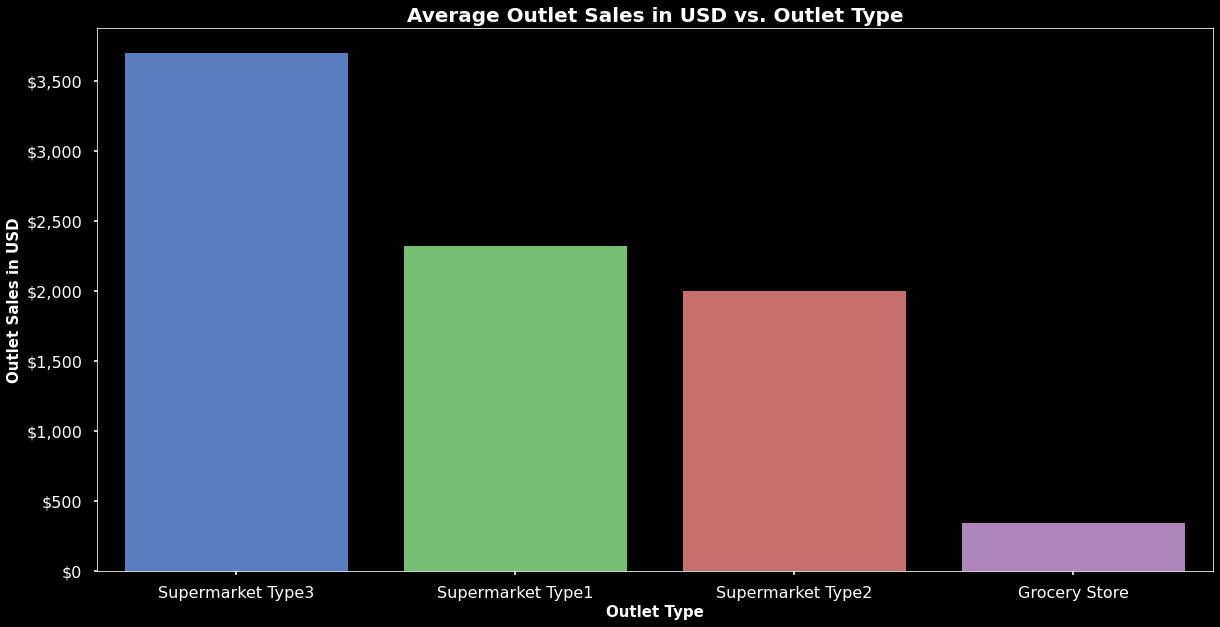

In [38]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Type', y = 'Item_Outlet_Sales', order = means.index, errorbar = None)
ax.set_title('Average Outlet Sales in USD vs. Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Sales in USD', fontsize = 15, fontweight = 'bold');

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)

The Outlet Type with the Most Sales: 


*   Supermarket Type3 with an average of over $3,500 in sales

The Outlet Type with the Least Sales:


*   Grocery Store with less then $500




####2.   What is the distribution of Item Visibility?

To answer this question I start out by creating a function called "plot_annotated_histogram". This function creates a histogram of a given column col in a pandas DataFrame df. This function starts with calculating the mean of the column, rounds it to 2 decimal places, and saves it as a variable mean. It then creates a histogram of the column using seaborn's histplot() function and adds a vertical line at the mean value using matplotlib's axvline() function. The function also sets a title for the plot and adds a legend to show the location of the mean line. Finally, the function returns the figure and axis objects

In [39]:
def plot_annotated_histogram(df, col):
    ## Saving the mean of the column
    mean = df[col].mean().round(2)
    # Plotting the histogram + new col's mean
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x=col, ax=ax)
    ax.axvline(mean, color='red',label=f'Mean {mean}');
    ax.set_title(col)
    ax.legend();
    return fig, ax

In this step I use the newly created function and give it the data as df, and the col = 'Item_Visibility'. This will create a histogram that shows that there are a greater count of lower visibility items, with the mean being 0.07.

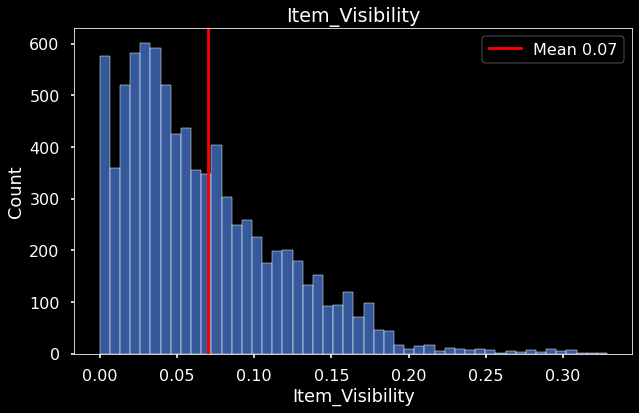

In [40]:
fig,ax = plot_annotated_histogram(df, col = 'Item_Visibility')

####3.   Which of the Item Types has the heaviest and lowest average weight?


In order to answer this question, I start by using df.groupby to group it by Item Type and calculate the mean of the Item Weight for each Item Type. I sort the values and assign it to the weight_means variable

In [41]:
weight_means = df.groupby('Item_Type')['Item_Weight'].mean().sort_values(ascending=False)
weight_means

Item_Type
Others                   13.615976
Starchy Foods            13.558074
Dairy                    13.285565
Household                13.254522
Fruits and Vegetables    13.116753
Health and Hygiene       13.048452
Snack Foods              12.919354
Frozen Foods             12.824007
Meat                     12.772341
Breakfast                12.736091
Seafood                  12.562422
Canned                   12.355586
Baking Goods             12.332917
Soft Drinks              11.967528
Breads                   11.581574
Hard Drinks              11.574112
Name: Item_Weight, dtype: float64

I then create a barchart using seaborn. I start with setting the figsize to 20,10, then I set the x axis to 'Item Type', y axis to 'Item Weight'. I then indicate order = weight_means.index which then displays the bars on the x-axis in the order i created in the previous step for 'weight_means'. After that I set the title 'Average Item Weight vs. Item Type', the x label to 'Item Type' and the y label to 'Item Weight'. Along the way I have adjusted the fontize and fonteight to my desired settings. I then create a new variable 'oz_fmt' which then stores a string format which I will then apply to the y axis in the next step that follows. I want the y axis to have oz after the number to indicate the weight

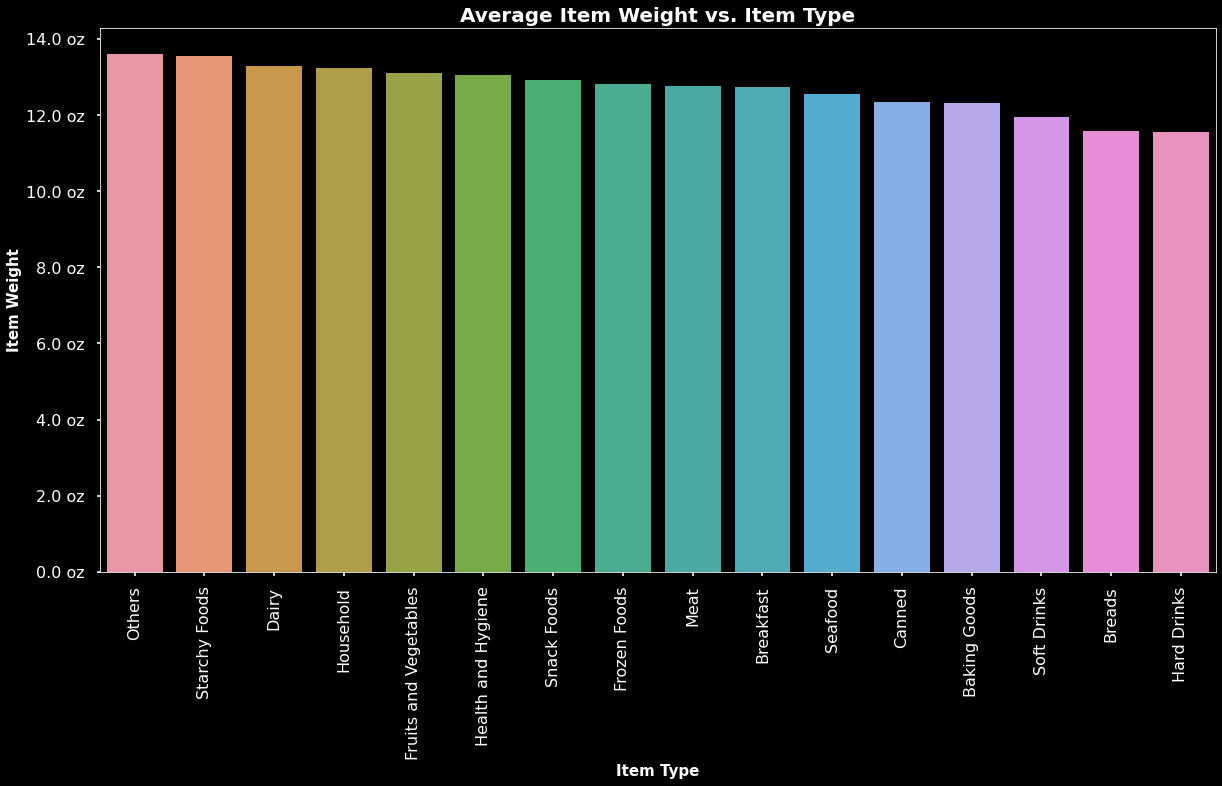

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Weight', order = weight_means.index, errorbar = None)
ax.set_title('Average Item Weight vs. Item Type', fontsize = 20, fontweight = 'bold');
plt.xticks(rotation = 90)
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Weight', fontsize = 15, fontweight = 'bold');

oz_fmt = mpl.ticker.StrMethodFormatter('{x} oz')
ax.yaxis.set_major_formatter(oz_fmt)

This shows that Others and Starchy Foods have the highest weights, while Breads and Hard Drinks have the lowest average weights in this data set